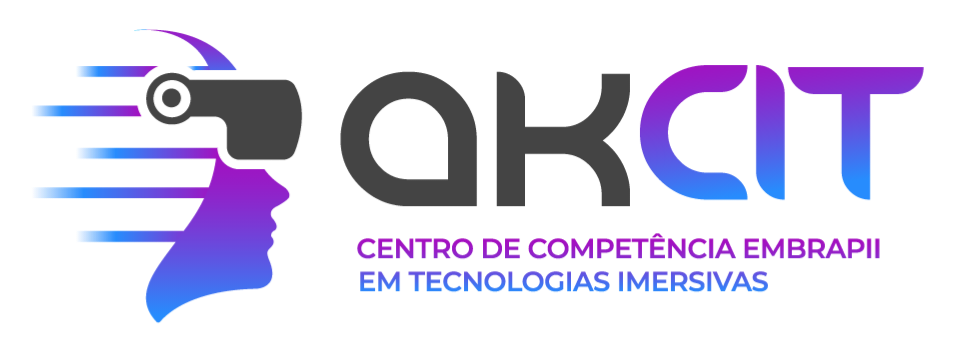


# Identificação

**Microcurso:** Ferramentas Generativas para Texto

**Docente:** Me. Paulo César Ferreira Melo


# Tópico 3.3 - Demonstração de Uso de Ferramentas para Manipulação de Modelos de Linguagem

Nesta seção, aplicamos os conceitos apresentados nas seções anteriores em uma demonstração prática. Vamos explorar o uso de um modelo de linguagem generativa pré-treinado, desde a inicialização até a geração de texto, com exemplos claros e objetivos.

**Objetivo da demonstração:**
* Mostrar como carregar e usar um modelo pré-treinado da biblioteca Hugging Face.
* Gerar texto a partir de prompts personalizados.
* Explorar como diferentes configurações de parâmetros impactam os resultados.
* Ao final, você será capaz de utilizar modelos de linguagem para tarefas práticas como geração de texto criativo, resumos ou respostas para perguntas específicas.








# Instalar a biblioteca Transformers (caso não esteja instalada)

In [1]:
!pip install transformers

# Carregando o Modelo

In [2]:
# Importa as classes para trabalhar com modelos e tokenizadores
from transformers import AutoModelForCausalLM, AutoTokenizer

# Define o nome de um modelo treinado para português
model_name = "pierreguillou/gpt2-small-portuguese"  # Modelo GPT-2 ajustado para português

# Carrega o modelo e o tokenizador correspondentes
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/92.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/850k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/508k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/510M [00:00<?, ?B/s]

# Gerando Texto a Partir de um Prompt

In [3]:
# Define o prompt inicial que será usado como entrada para o modelo
prompt = """
Escreva um parágrafo em português sobre como a inteligência artificial está transformando o setor de saúde.
Foque em exemplos como diagnósticos precisos, análise de dados médicos e personalização de tratamentos.
"""

# Tokeniza o prompt, convertendo-o em tensores que o modelo pode processar
# - return_tensors="pt": Retorna os tokens no formato de tensor PyTorch
inputs = tokenizer.encode(prompt, return_tensors="pt")

# Gera texto com base no prompt tokenizado
outputs = model.generate(
    inputs,
    max_length=200,  # Limita o comprimento da saída
    num_return_sequences=1,  # Gera uma sequência
    temperature=0.9,  # Controla a criatividade do texto
    do_sample=True,  # Ativa amostragem aleatória
    pad_token_id=tokenizer.eos_token_id,  # Define o token de preenchimento
    top_p=0.95,
    eos_token_id=None
)

# Decodifica os tokens gerados de volta para texto legível
# - skip_special_tokens=True: Remove tokens especiais, como "<|endoftext|>"
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Exibe o texto gerado
print(generated_text)


Escreva um parágrafo em português sobre como a inteligência artificial está transformando o setor de saúde.
Foque em exemplos como diagnósticos precisos, análise de dados médicos e personalização de tratamentos.

Pesquisa em desenvolvimento.

Fortalezas da política externa, como uma política econômica, com foco no combate à corrupção.

A sociedade civil e suas políticas internas.

O Fórum da Paz, em Brasília, onde é publicado um relatório anual sobre os temas abordados por ela.

Em seu livro "The Government of the World: Global Government in the Global Economy", o escritor de Direito David Friedman afirma que os cidadãos, com base em suas experiências pessoais, não precisam se envolver em ações de tomada de decisões políticas, enquanto que a liberdade de expressão dos cidadãos pode ser estendida para qualquer situação.

As políticas públicas e privadas que têm impacto direto na sociedade são a política externa e o investimento. Em particular, eles fornecem recursos financeiros e mater

# Prompt para gerar um resumo

In [4]:
# Prompt para gerar um resumo
prompt = "Resuma o seguinte texto: A reciclagem é importante porque reduz resíduos, economiza energia e protege o meio ambiente."

inputs = tokenizer.encode(prompt, return_tensors="pt")

outputs = model.generate(inputs, max_length=60, num_return_sequences=1, temperature=0.7)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Resuma o seguinte texto: A reciclagem é importante porque reduz resíduos, economiza energia e protege o meio ambiente.

A reciclagem é um processo de reciclagem que consiste em a remoção de resíduos de forma a reduzir o tempo de vida dos seres humanos. A reciclagem é um processo de reciclagem que consiste
